In [5]:
print("hallo welt")

hallo welt


In [3]:
import keras
print(keras.__version__
    )

Using TensorFlow backend.


2.1.5


# Daten aus JSON 

hallo 


In [4]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())
    print(games)

{'timestamp': '1528801930', 'valid_from': '2017-09-29', 'valid_till': '2018-06-16', 'competition': [{'@attributes': {'ID': '1', 'title': 'easyCredit BBL Hauptrunde'}, 'spiel': [{'spiel_nummer': '0', 'bbl_spielID': '20826', 'tag': '1', 'home_id': '540', 'home': 's.Oliver Würzburg', 'homeCity': 'Würzburg', 'home_result': '76', 'gast_id': '420', 'gast': 'Brose Bamberg', 'gastCity': 'Brose Bamberg', 'gast_result': '73', 'datum': '2017-09-29', 'uhrzeit': '20:30:00', 'arenaName': 'S.Oliver-Arena', 'arenaLat': '49.77337', 'arenaLon': '9.93923', 'zuschauer': '3140', 'live_url': 'http://live.beko-bbl.de/data/bbl/540/20826.JSN', 'init_url': 'http://live.beko-bbl.de/data/bbl/540/20826.JSN'}, {'spiel_nummer': '0', 'bbl_spielID': '20827', 'tag': '1', 'home_id': '422', 'home': 'Basketball Löwen Braunschweig', 'homeCity': 'Braunschweig', 'home_result': '81', 'gast_id': '439', 'gast': 'Eisbären Bremerhaven', 'gastCity': 'Bremerhaven', 'gast_result': '68', 'datum': '2017-09-29', 'uhrzeit': '20:30:00', 

In [5]:
print(json.dumps(games, indent=4, sort_keys=True))


{
    "competition": [
        {
            "@attributes": {
                "ID": "1",
                "title": "easyCredit BBL Hauptrunde"
            },
            "spiel": [
                {
                    "arenaLat": "49.77337",
                    "arenaLon": "9.93923",
                    "arenaName": "S.Oliver-Arena",
                    "bbl_spielID": "20826",
                    "datum": "2017-09-29",
                    "gast": "Brose Bamberg",
                    "gastCity": "Brose Bamberg",
                    "gast_id": "420",
                    "gast_result": "73",
                    "home": "s.Oliver W\u00fcrzburg",
                    "homeCity": "W\u00fcrzburg",
                    "home_id": "540",
                    "home_result": "76",
                    "init_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "live_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "spiel_nummer": "0",
                 

In [6]:
type(games)

dict

In [7]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Standings.php?type=json") as url:
    team = json.loads(url.read().decode())

print(team['team'][0]['team'])
print(team['team'][0]['team_id'])

FC Bayern München
486


In [8]:
t = 0
team_ids = [] 
while t < 18:
    team_ids.append(team['team'][t]['team_id'])
    t=t+1
print(team_ids)

['486', '413', '433', '420', '415', '425', '430', '426', '540', '418', '421', '422', '483', '477', '428', '439', '517', '432']


In [9]:
j = 0
team_namen = [] 
while j < 18:
    team_namen.append(team['team'][j]['team_id'])
    team_namen.append(team['team'][j]['team'])
    j=j+1

print(team_namen)

['486', 'FC Bayern München', '413', 'ALBA BERLIN', '433', 'MHP RIESEN Ludwigsburg', '420', 'Brose Bamberg', '415', 'Telekom Baskets Bonn', '425', 'medi bayreuth', '430', 'EWE Baskets Oldenburg', '426', 'FRAPORT SKYLINERS', '540', 's.Oliver Würzburg', '418', 'ratiopharm ulm', '421', 'GIESSEN 46ers', '422', 'Basketball Löwen Braunschweig', '483', 'Science City Jena', '477', 'BG Göttingen', '428', 'Mitteldeutscher BC', '439', 'Eisbären Bremerhaven', '517', 'Rockets', '432', 'WALTER Tigers Tübingen']


In [10]:
 from sklearn.preprocessing import LabelBinarizer
 encoder = LabelBinarizer()
 transformed_label = encoder.fit_transform(team_ids)

 print(transformed_label)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [11]:
home_id = "418"
index = team_ids.index(home_id)
print(index)
print(transformed_label[index])

9
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
    def make_pair(home_id, gast_id, home_win):

        home_index = team_ids.index(home_id)
        home_encoded = transformed_label[home_index]

        gast_index = team_ids.index(gast_id)
        gast_encoded = transformed_label[gast_index]

        if home_win == True:
            win_encoded = 1.0
        else: 
            win_encoded = 0.0

        return (home_encoded, gast_encoded), win_encoded

    input, output = make_pair("418", "486", False)

    print(input)
    print(output)

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))
0.0


In [13]:
print (games['competition'][0]['spiel'][0]['home_id'])

540


## Preprocessing dataset: 
    - hot encoded
    - dummie variable trap

In [14]:
#
import numpy as np

def make_pair(home_id, gast_id, home_win):
        
    home_index = team_ids.index(home_id)
    home_encoded = transformed_label[home_index]

    gast_index = team_ids.index(gast_id)
    gast_encoded = transformed_label[gast_index]

    if home_win == True:
        win_encoded = 1.0
    else: win_encoded = 0.0

    return (np.append(home_encoded, gast_encoded)), win_encoded
    
inputs = []
outputs = []

#amount_val = 30
inputs_val = []
outputs_val = []



for i in range(0,len(games['competition'][0]['spiel'])):
    
    home_win = False

    if games['competition'][0]['spiel'][i]['home_result'] > games['competition'][0]['spiel'][i]['gast_result']:
        home_win = True
    else: home_win = False
        
    input, output = make_pair(games['competition'][0]['spiel'][i]['home_id'], games['competition'][0]['spiel'][i]['gast_id'], home_win)
    
    # Validation Menge bestimmten
    if i < 276: 
        inputs.append(input)
        outputs.append(output)
    else: 
        inputs_val.append(input)
        outputs_val.append(output)
        
    
    
print(inputs)
print(outputs)



[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), array([

In [15]:
# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 36, kernel_initializer = 'uniform', activation = 'relu', input_shape = (36,)))

# Adding the second hidden layer
regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Summary 
regressor.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,713
Trainable params: 1,713
Non-trainable params: 0
_________________________________________________________________


In [16]:

# Compiling the ANN - wie soll es lernen
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = regressor.fit(np.array(inputs), np.array(outputs), batch_size = 10, epochs = 100, validation_split = 0.1)

#history: Speichert die Lernergebniss über die Epochen


Train on 248 samples, validate on 28 samples
Epoch 1/100
248/248 [==============================] - 0s 825us/step - loss: 0.2499 - acc: 0.5121 - val_loss: 0.2497 - val_acc: 0.5714
Epoch 2/100
248/248 [==============================] - 0s 123us/step - loss: 0.2497 - acc: 0.5363 - val_loss: 0.2494 - val_acc: 0.5714
Epoch 3/100
248/248 [==============================] - 0s 123us/step - loss: 0.2489 - acc: 0.5363 - val_loss: 0.2482 - val_acc: 0.5714
Epoch 4/100
248/248 [==============================] - 0s 128us/step - loss: 0.2464 - acc: 0.5565 - val_loss: 0.2459 - val_acc: 0.5357
Epoch 5/100
248/248 [==============================] - 0s 131us/step - loss: 0.2406 - acc: 0.5887 - val_loss: 0.2399 - val_acc: 0.5357
Epoch 6/100
248/248 [==============================] - 0s 139us/step - loss: 0.2282 - acc: 0.6815 - val_loss: 0.2316 - val_acc: 0.6429
Epoch 7/100
248/248 [==============================] - 0s 131us/step - loss: 0.2126 - acc: 0.7177 - val_loss: 0.2235 - val_acc: 0.6429
Epoch 8/10

Epoch 61/100
248/248 [==============================] - 0s 131us/step - loss: 0.0664 - acc: 0.9516 - val_loss: 0.2585 - val_acc: 0.6786
Epoch 62/100
248/248 [==============================] - 0s 134us/step - loss: 0.0636 - acc: 0.9476 - val_loss: 0.2592 - val_acc: 0.6786
Epoch 63/100
248/248 [==============================] - 0s 133us/step - loss: 0.0618 - acc: 0.9516 - val_loss: 0.2594 - val_acc: 0.7500
Epoch 64/100
248/248 [==============================] - 0s 137us/step - loss: 0.0595 - acc: 0.9516 - val_loss: 0.2599 - val_acc: 0.6786
Epoch 65/100
248/248 [==============================] - 0s 137us/step - loss: 0.0574 - acc: 0.9556 - val_loss: 0.2638 - val_acc: 0.7143
Epoch 66/100
248/248 [==============================] - 0s 132us/step - loss: 0.0556 - acc: 0.9556 - val_loss: 0.2643 - val_acc: 0.7143
Epoch 67/100
248/248 [==============================] - 0s 125us/step - loss: 0.0543 - acc: 0.9597 - val_loss: 0.2691 - val_acc: 0.6786
Epoch 68/100
248/248 [==========================

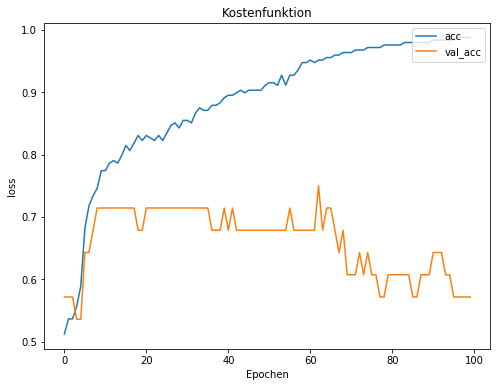

In [17]:
#Val_loss und loss Diagramm
import matplotlib.pyplot as plt

handles = []

label, = plt.plot(history.history['acc'], label="acc")
handles.append(label)
label, = plt.plot(history.history['val_acc'], label="val_acc")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('loss')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()


In [18]:
result = regressor.evaluate(np.array(inputs_val), np.array(outputs_val))
print(result)

30/30 [==============================] - 0s 42us/step
[0.25277572870254517, 0.6666666865348816]


In [19]:
regressor.predict(np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ,0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0]]))

array([[0.94672316]], dtype=float32)